<a href="https://colab.research.google.com/github/shahfaissal/capstone_project2/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#import all the required libraries
import numpy as np
import pandas as pd 


#Visualiztion libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import The Date Class
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

#for model building 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


#---- For handling warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
dataset = pd.read_csv("/content/drive/MyDrive/Copy of SeoulBikeData.csv",encoding = 'unicode_escape')

Data Inspection

Here we can clearly see what varibles we are dealing with in order to perform neccessary data analysis.

In [86]:
# First look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


As from the following information we can clearly see that there are no null values to deal with and so we can proceed further with outlier detection during the data preparation for regression model.

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [88]:
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


From the following step we can see that there are no duplicates in the dataset and so we can skip the de-duplication step and proceed further with our cleaning.

In [89]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [90]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

From above Dataset,it is observed that:

1.There are 14 columns in our dataset.

2.All the columns may not be of same importance we're major focused on 'Rented Bike Count' , 'Holiday' , 'Functioning Day' , 'Seasons'.

3.There is no null value in dataset.

4.Column 'Rented Bike Count' is dependent variable and other columns are independent variables.

In [91]:
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

As we have a date column in the given dataset, we import datetime module in order to segragate the date in terms of day, month and year. As we have data of only limited number of years, we can skip using year in our data analysis and focus the dependance only on month and day/date.

In [92]:
from datetime import datetime
import datetime as dt

In [93]:
# splitting "Date" column into three other columns like "year","month","day".
dataset['Date'] = dataset['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [94]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

# Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

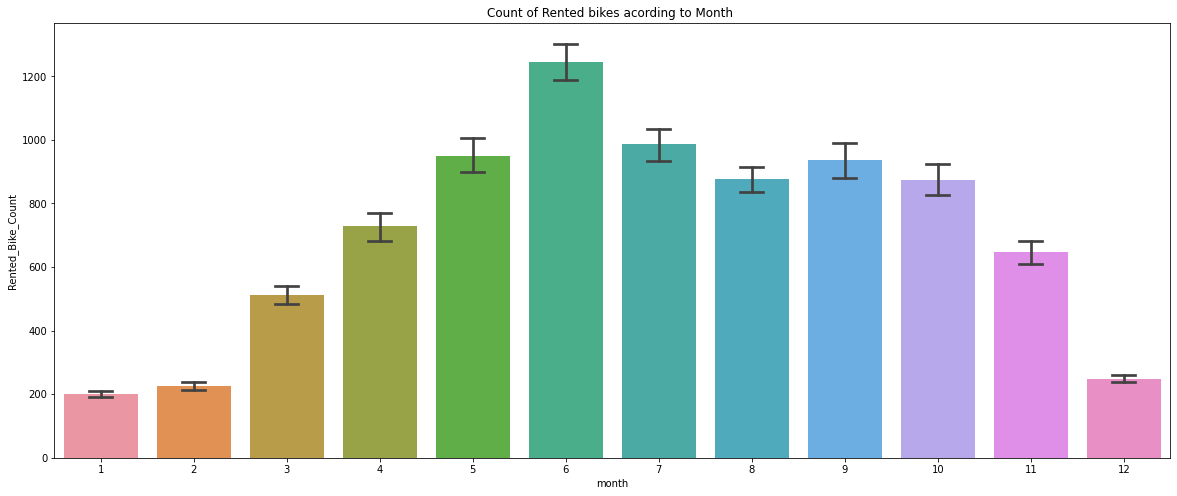

In [95]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='month',y='Rented_Bike_Count',ax=ax,capsize=.25)
ax.set(title='Count of Rented bikes acording to Month ')

# Observation
From the above barplot, we can conclude that the demand for rented bikes depends on the month of the year and so this becomes one of the import parameters in our analysis and regresssion model as well. The demand is at peak during the midyear.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

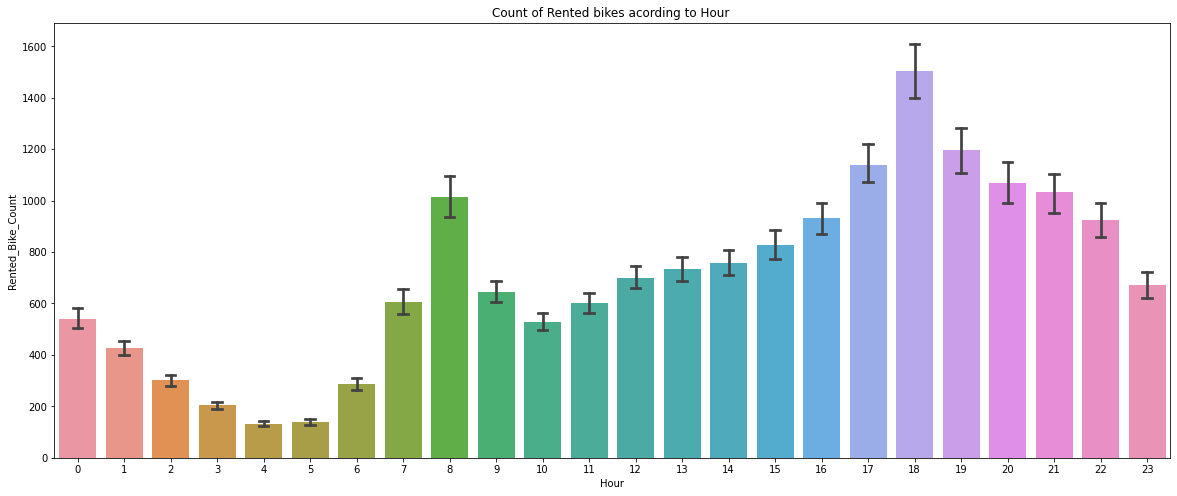

In [96]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

# Observation
From the above barplot, we can conclude that the demand for rented bikes depends on the hour of the day and so this becomes one of the import parameters in our analysis and regresssion model as well. The demand is at peak during the working ours.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

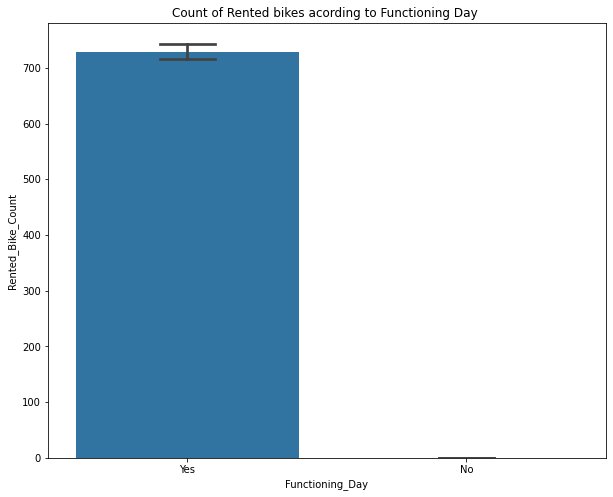

In [97]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

The demand is only on functioning day and so we can conclude that the demand will remain lowest during the non functioning day.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

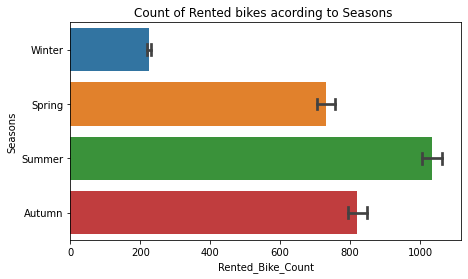

In [98]:
fig,ax=plt.subplots(figsize=(7,4))
sns.barplot(data=dataset,x='Rented_Bike_Count',y='Seasons',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

From the above graph we analyze that the demand depends on the season we are in. There is quite less demand during the winter season.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

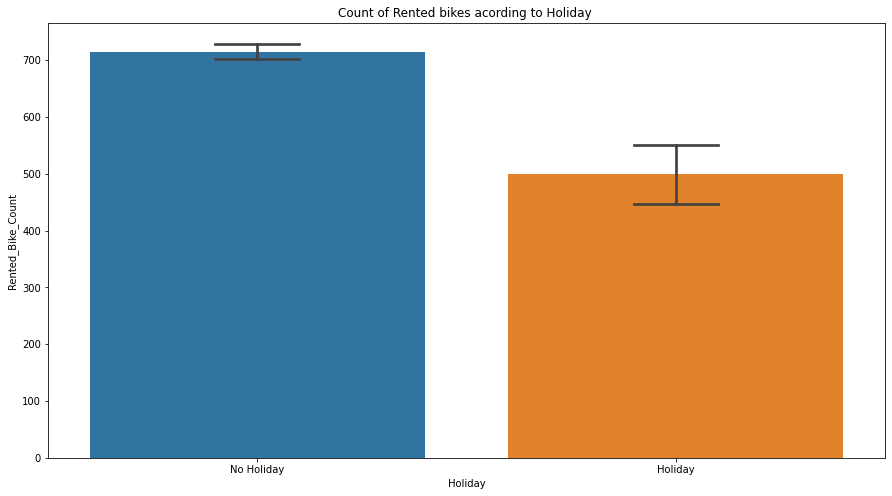

In [99]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

Based on the above analysis, we can conclude that the demand is quite higher on a working day as compared to holiday. And so we can also conclude that mostly the people working on working days are using the rented bikes for their use for office related work or other purpose.

In [100]:
numerical_columns=list(dataset.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'month'],
      dtype='object')

In the above step we used .describe just to segregate the numerical feaatures form the dataset in order get the boxplots of the features using a for loop.

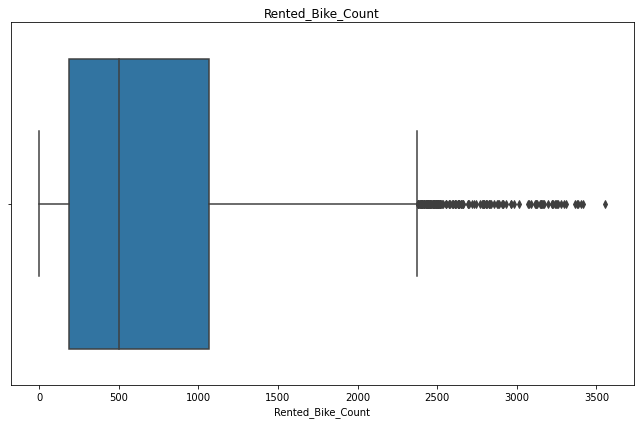

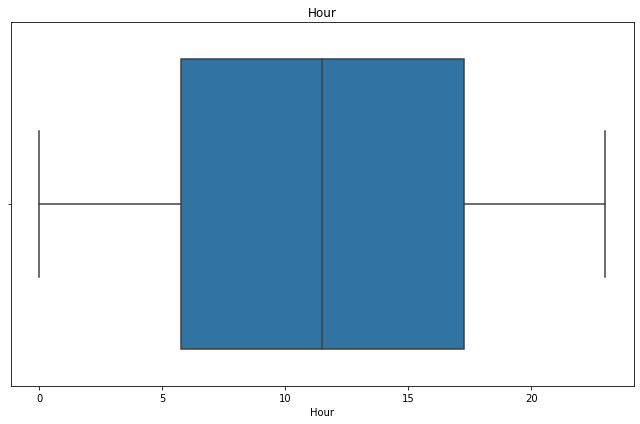

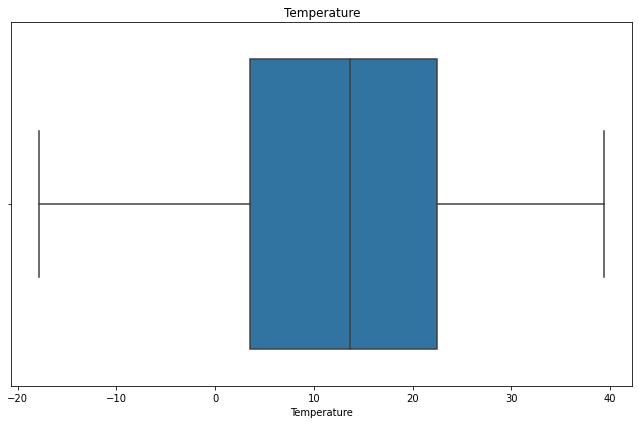

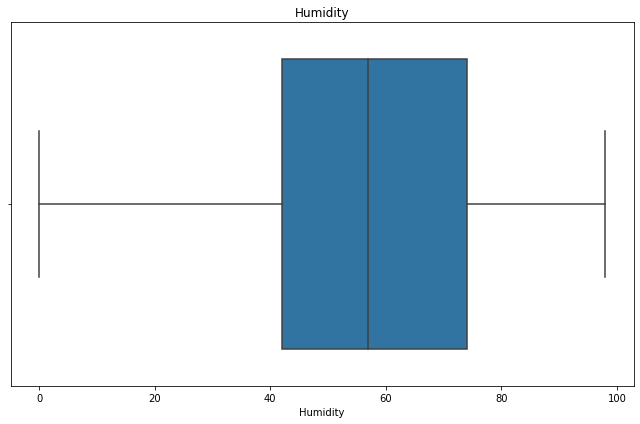

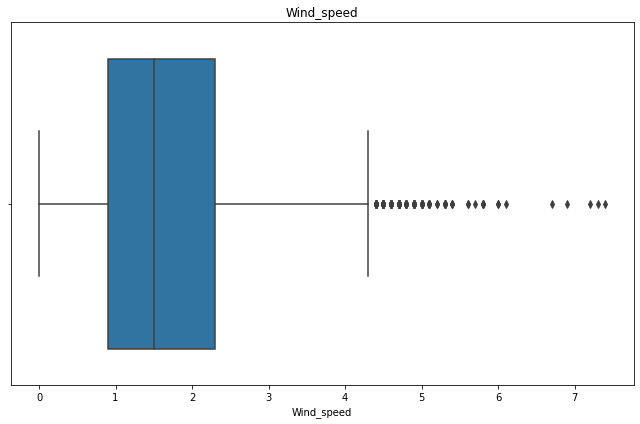

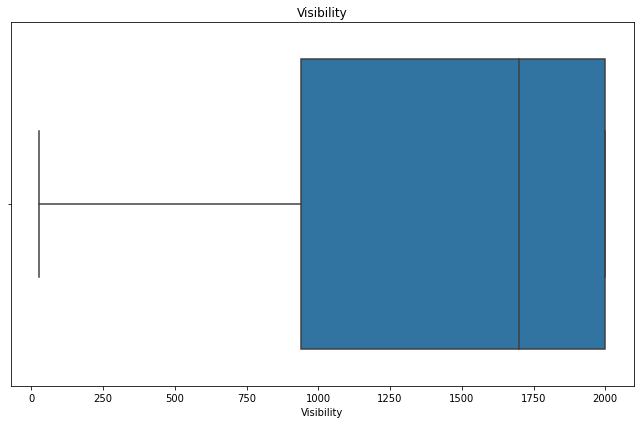

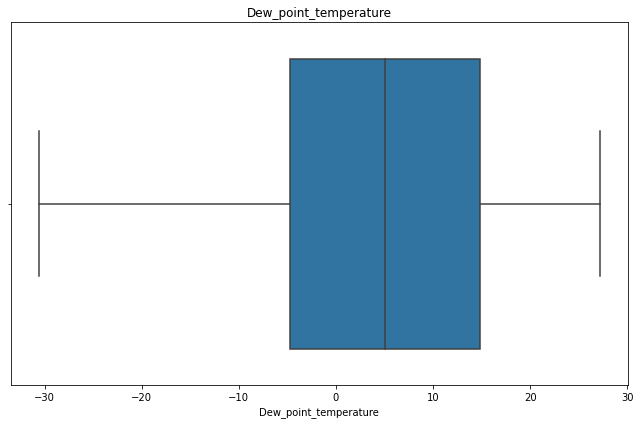

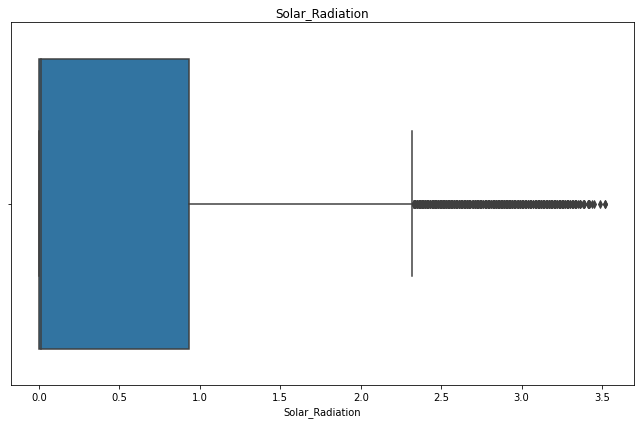

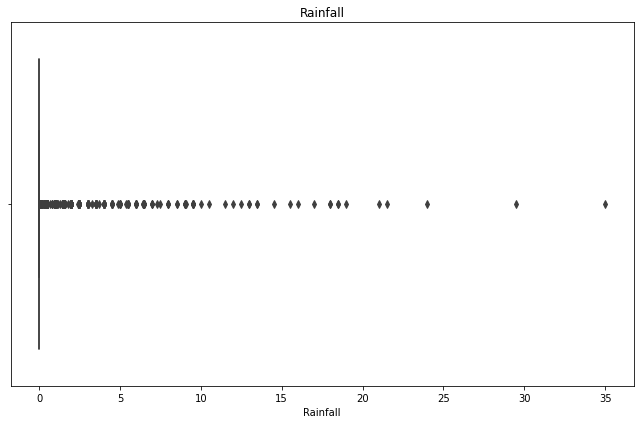

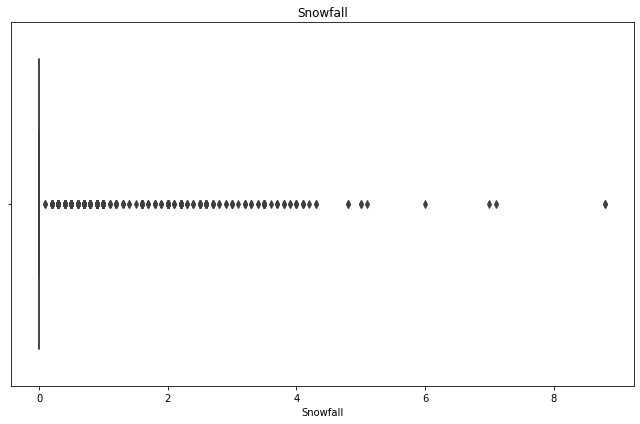

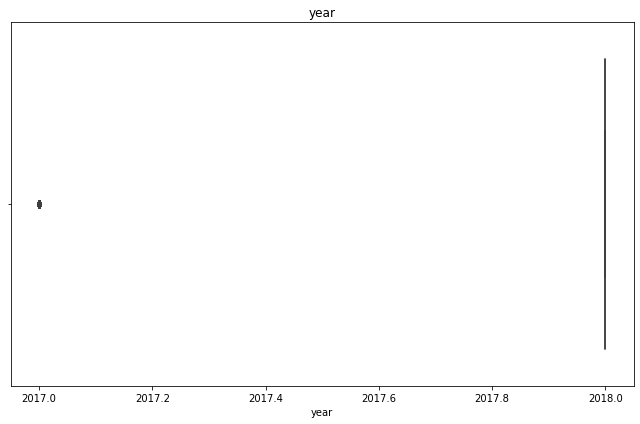

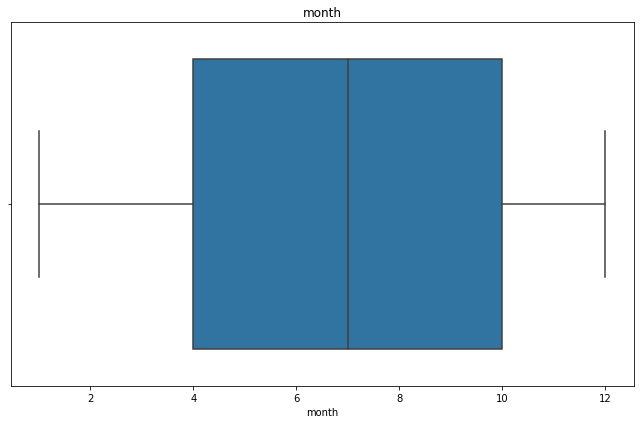

In [101]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

From the above boxplots firstly we conclude that our dependent varible is not evenly distributed and so we will proceed further after using proper function to noramlly distribute our dependent variable. Secondly, we see some of the varibles having outliers and in order to enhance the regression model functionality, we try to reduce the effect of these outliers. As in our real life, we use bikes during moderate showers for rainy and during moderate sunshine and snowfall, we try to filter out the outliers using the following steps.

In [102]:
dataset.loc[dataset['Rainfall']>=4,'Rainfall']= 4
dataset.loc[dataset['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5 
dataset.loc[dataset['Snowfall']>2,'Snowfall']= 2
dataset.loc[dataset['Wind_speed']>=4,'Wind_speed']= 4

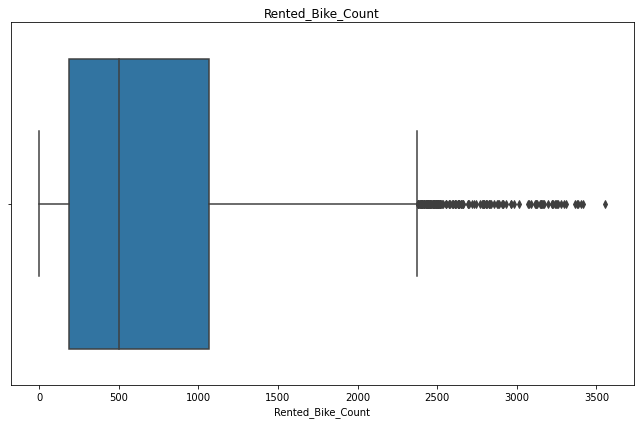

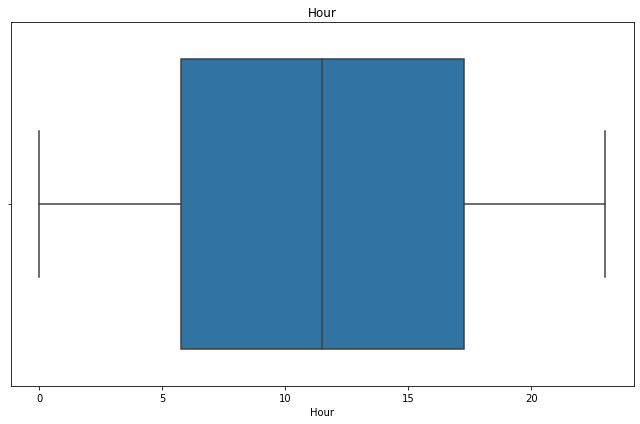

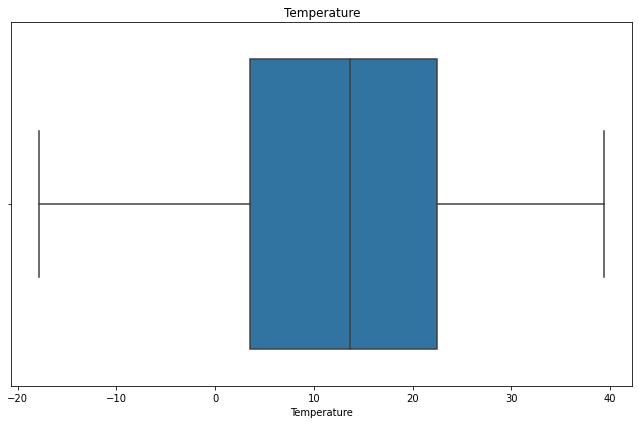

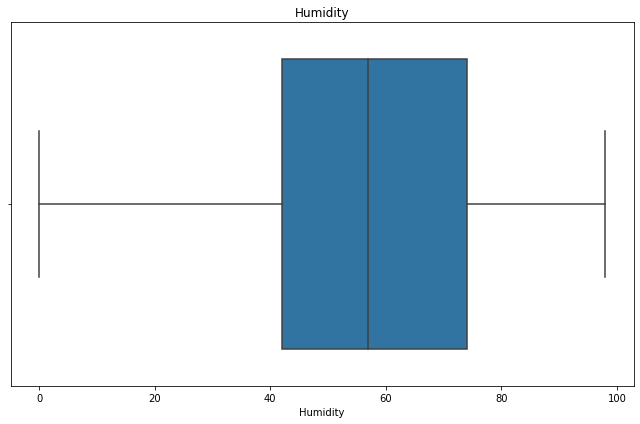

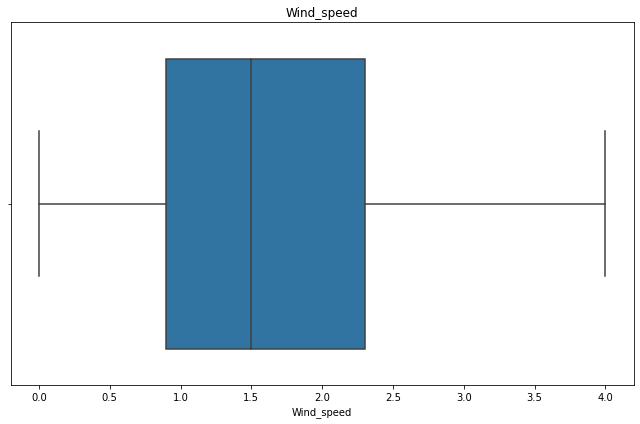

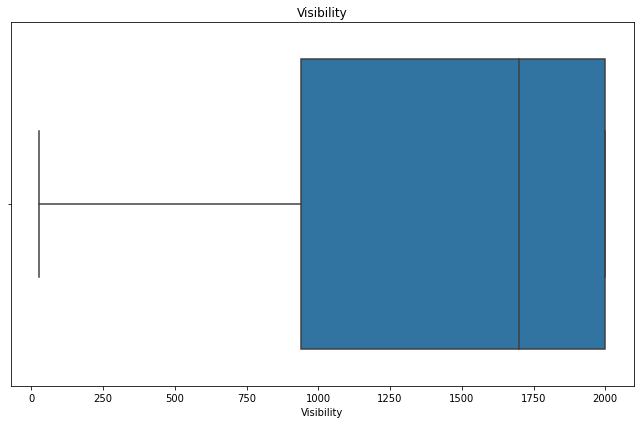

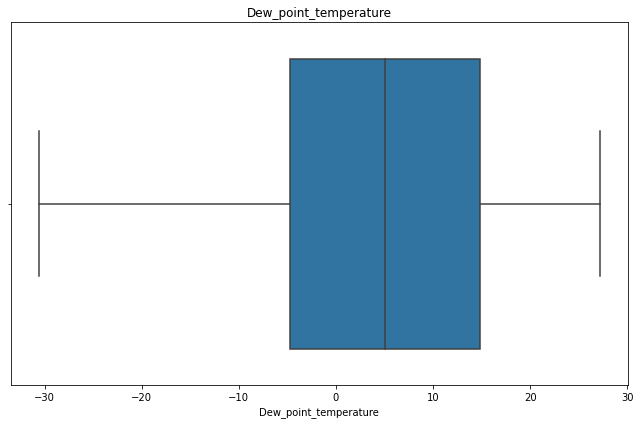

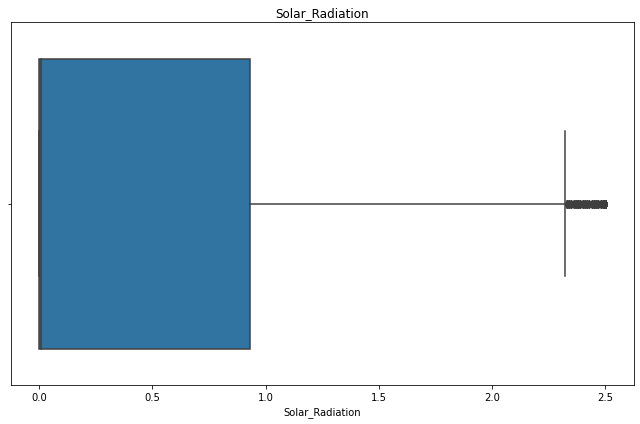

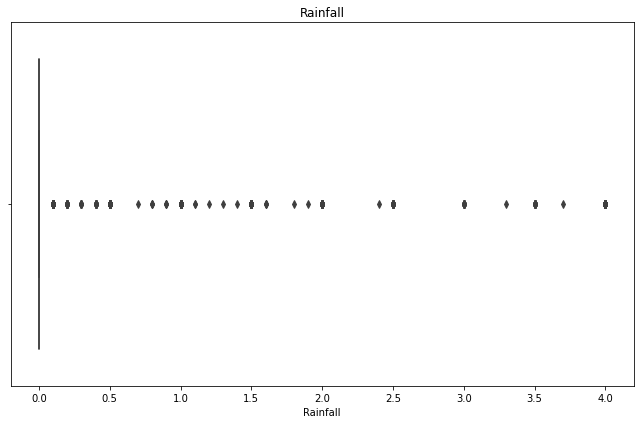

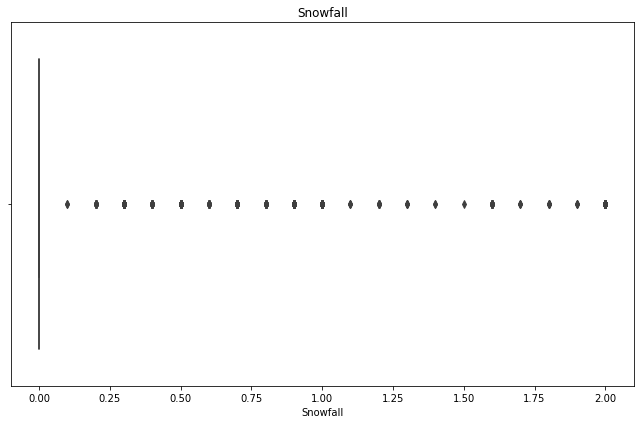

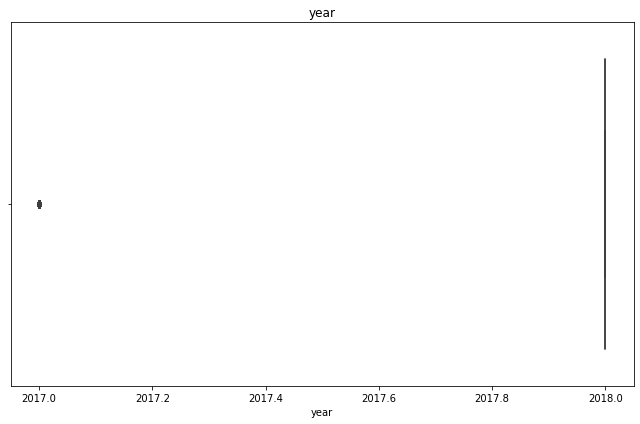

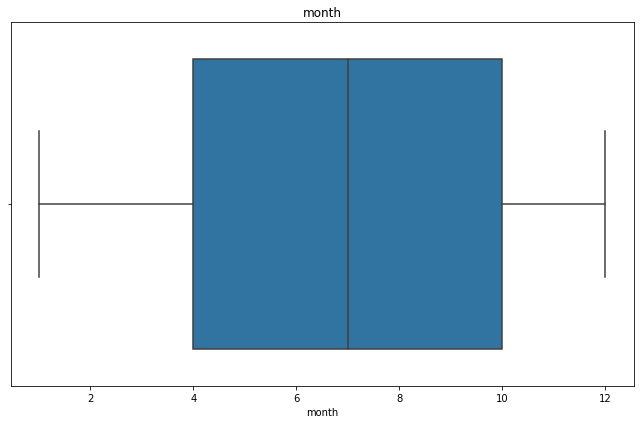

In [103]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

After outlier treatments we can clearly see that the above boxplots had minimal outliers.

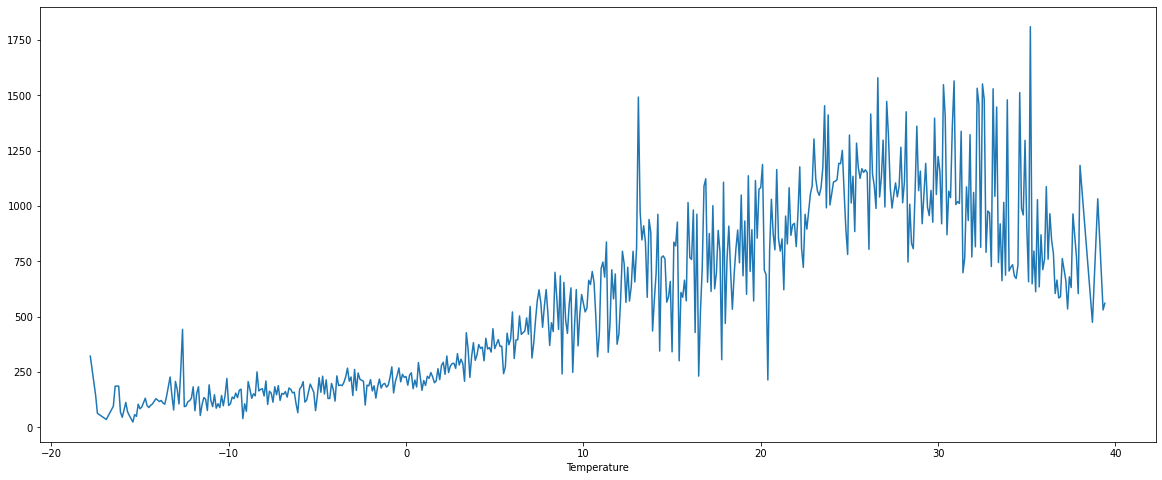

In [104]:
dataset.groupby('Temperature').median()['Rented_Bike_Count'].plot()

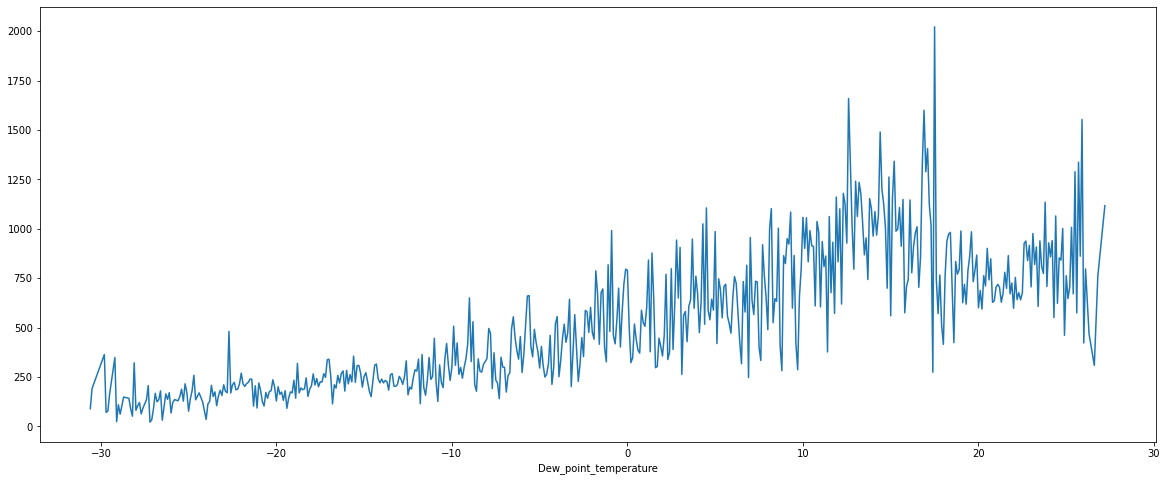

In [105]:
dataset.groupby('Dew_point_temperature').median()['Rented_Bike_Count'].plot()

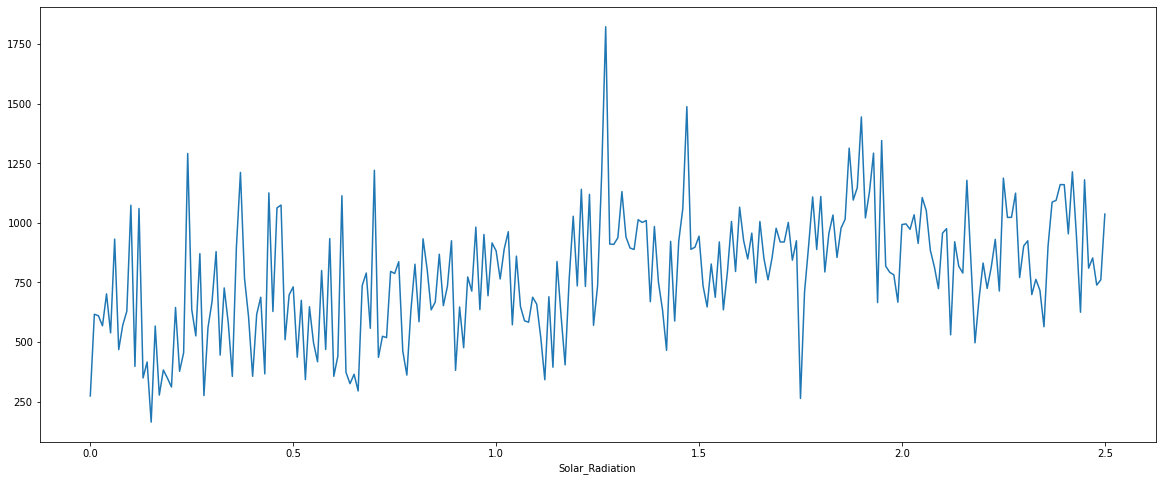

In [106]:
dataset.groupby('Solar_Radiation').median()['Rented_Bike_Count'].plot()

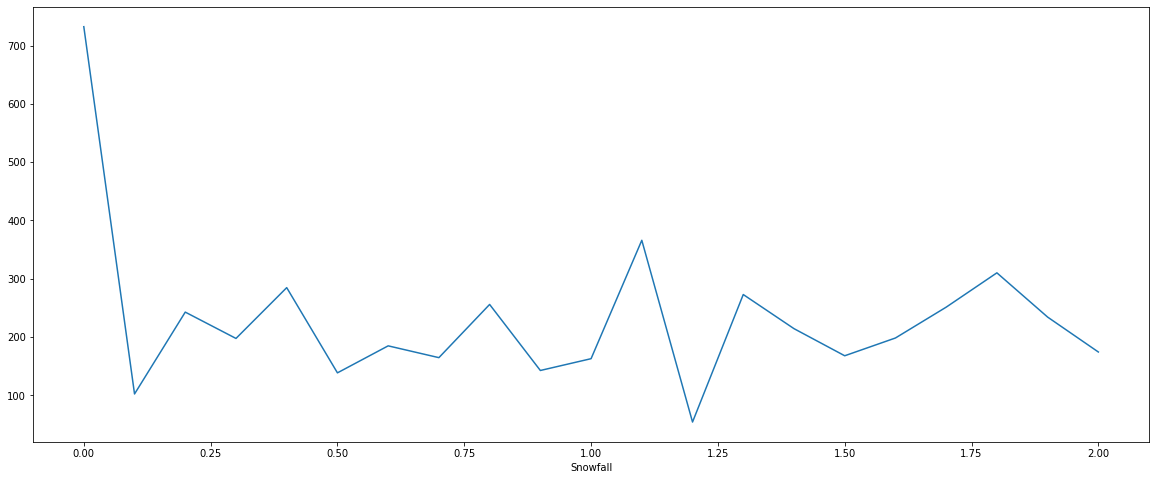

In [107]:
dataset.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

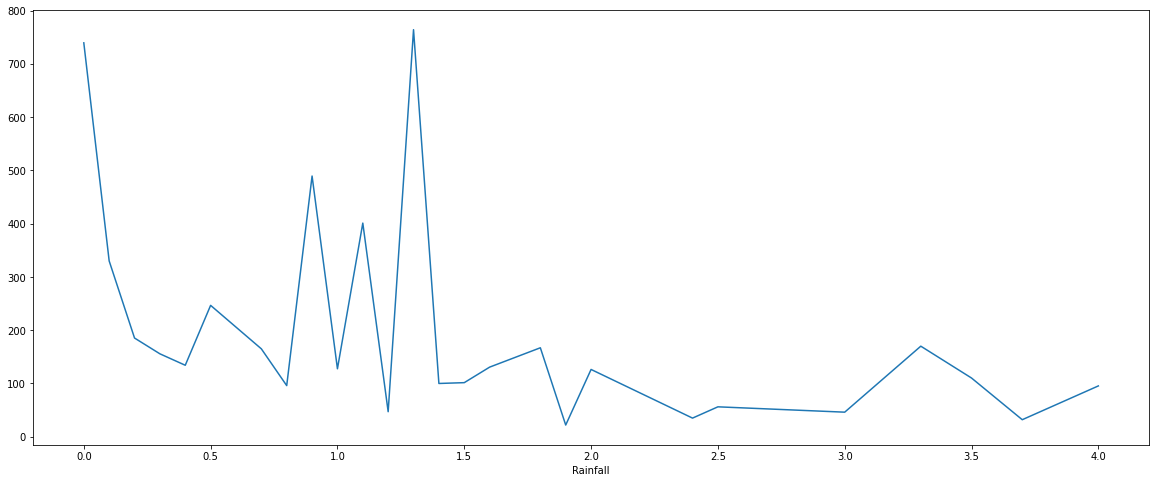

In [108]:
dataset.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

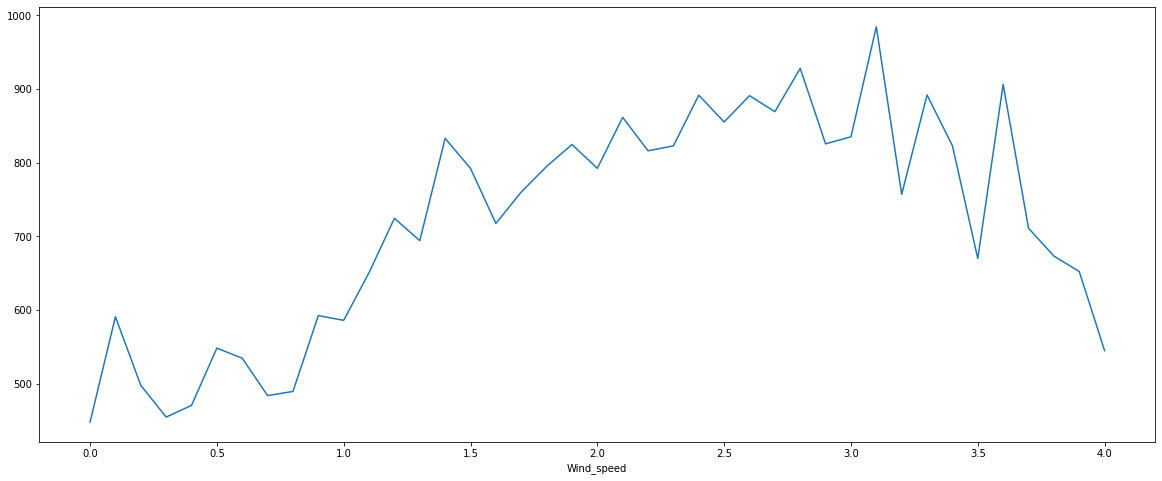

In [109]:
dataset.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

We can see the effect of the numeric features on our dependent variable ie rented bike count. We can conclude that these features have large effect while predicting the dependent varible in our model.

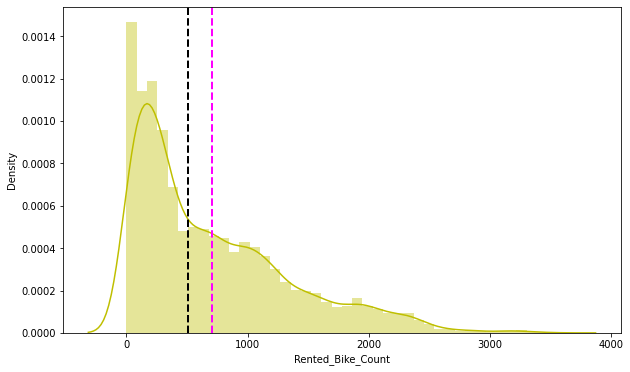

In [110]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(dataset['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(dataset['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(dataset['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

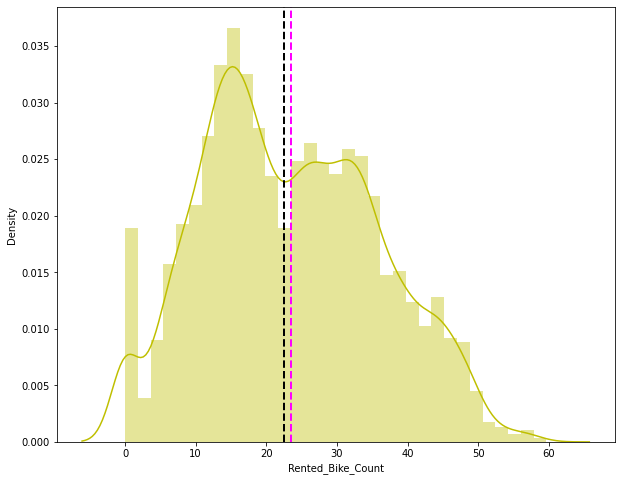

In [111]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(dataset['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

In order to normally distribute the positively skewed distribution of our dependent variable, we used square root function and tried to improve the distribution of our varible. After ensuring the proper distribution we can proceed further with our analysis of correaltion.

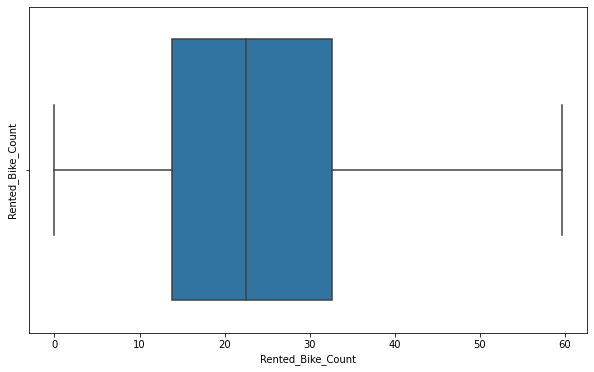

In [112]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(dataset['Rented_Bike_Count']))
plt.show()

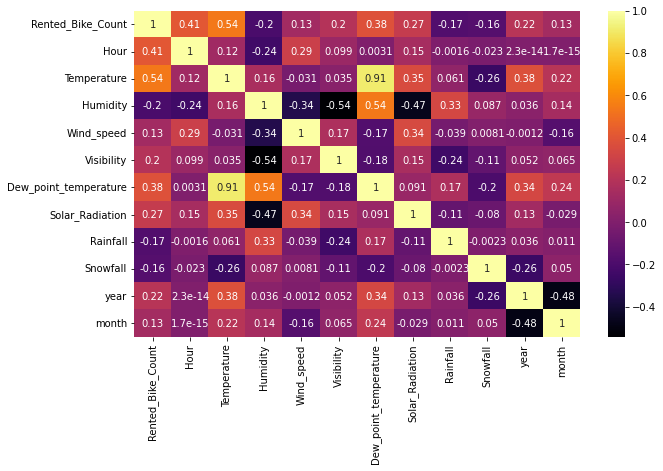

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [115]:
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

As we can see there are some Highly collinear features in the dataset. We remove one of them by simply dropping the feature from the dataset. In our case we drop dew point temprature which is highly collinear with temparature feature. As we have some negatively correlated features as well, we simply remove them as well.

In [116]:
dataset=dataset.drop(['Snowfall'],axis=1)
dataset=dataset.drop(['Visibility'],axis=1)

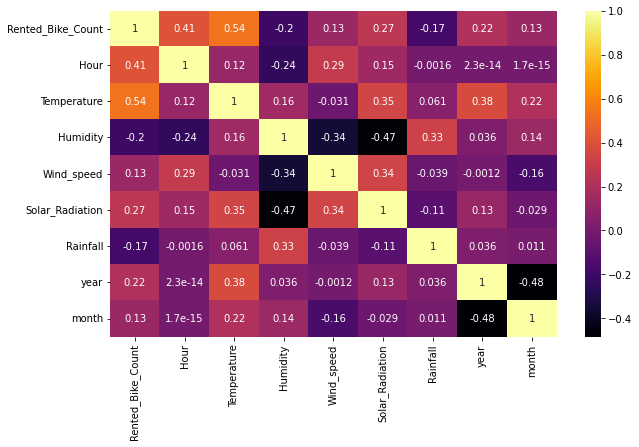

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [118]:
import statsmodels.api as sm
X = dataset[[ 'Temperature','Humidity',
       'Wind_speed',
       'Solar_Radiation', 'Rainfall']]
Y = dataset['Rented_Bike_Count']
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Seasons,Holiday,Functioning_Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


We define X and Y as for independent and dependent features respectively for our model fitting.

In [119]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
0,1.0,-5.2,37,2.2,0.0,0.0
1,1.0,-5.5,38,0.8,0.0,0.0
2,1.0,-6.0,39,1.0,0.0,0.0
3,1.0,-6.2,40,0.9,0.0,0.0
4,1.0,-6.0,36,2.3,0.0,0.0
...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,0.0,0.0
8756,1.0,3.4,37,2.3,0.0,0.0
8757,1.0,2.6,39,0.3,0.0,0.0
8758,1.0,2.1,41,1.0,0.0,0.0


We add a constant column with value 1 for B0 value that is intersection point in our model whicch will contribute to introducce bias in our model equation.

In [120]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:35:02   Log-Likelihood:                -66832.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8754   BIC:                         1.337e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             772.7524     24.771     31.196      0.000     724.195     821.310
Temperature        34.9916      0.519     67.391      0.000      33.974      36.009
Humidity           -9.3922      0.343    -27.401      0.000     -10.064      -8.720
Wind_speed         62.8582      5.939     10.584      0.000      51.217      74.500
Solar_Radiation  -116.4219      8.751    -13.304      0.000    -133.576     -99.268
Rainfall         -160.2743     11.052    -14.502      0.000    -181.939    -138.610
==============================================================================
Omnibus:                      955.374   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1595.330
Skew:                           0.766   Prob(JB):                         0.00
Kurtosis:                       4.423   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
const,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.350679,0.061274
Humidity,NaN,0.159371,1.000000,-0.341432,-0.467236,0.331631
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.342995,-0.038813
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,1.000000,-0.105920
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.105920,1.000000


In [122]:
dataset['day']=dataset.apply((lambda x : 0 if x['day']=='Sunday' or x['day']=='Saturday' else 1),axis=1)

In [123]:
dataset=pd.get_dummies(dataset, columns=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'], prefix=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'])

We added dummies in our dataset as these are the variables with multiple values and higher significance.

In [125]:
dataset=dataset.drop(['year'],axis=1)

In [126]:
dataset=dataset.drop(['Date'],axis=1)

In [127]:
dataset

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,day,Hour_0,Hour_1,Hour_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,0.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [129]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,9.983338
1,Humidity,2.005530
2,Wind_speed,1.438747
3,Solar_Radiation,4.960836
4,Rainfall,1.196389
5,day,1.008332
6,Hour_0,inf
7,Hour_1,inf
8,Hour_2,inf
9,Hour_3,inf


The high VIF values for dummies can be ignored but for other varibles it is well within range.


# Ordinary Least Squares model

In [130]:
X = dataset.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset['Rented_Bike_Count'])

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(7008, 50)
(1752, 50)


In [132]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [133]:
reg.score(X_train, y_train)

0.7932751499126951

In [134]:
reg.score(X_test, y_test)

0.7957394972701987

In [135]:
reg.coef_

array([ 4.48388022e-01, -1.19475444e-01, -7.52103057e-03,  8.56367785e-01,
       -5.20062829e+00,  1.45606925e+00,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  3.90146580e+10,  6.24220366e+11,
        1.34424113e+12,  2.04234347e+11,  1.36663578e+11,  1.36663578e+11,
        1.14144054e+11,  1.14144054e+11,  3.94550791e+11,  3.94550791e+11,
       -2.54352280e+10, -2.54352280e+10, -2.54352280e+10, -7.45455996e+11,
       -7.45455996e+11, -7.45455996e+11,  5.59770480e+11,  5.59770480e+11,
        5.59770480e+11,  3.94550791e+11])

In [136]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [137]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 32.09815332904518
RMSE : 5.665523217589456
MAE : 4.312666558238763
R2 : 0.7932751499126951
Adjusted R2 : 0.7871985817149495


With quite low value of MSE we can conclude that the model is highly accurate. RMSE value denotes the distribution of the values across the best fit line is well within the acceptable limits. MAE value is low and so the model performance can be considered to be acceptable. R2 and Adjusted R2 are quite closer towards 1 and so we can see that the model performance is good enough to perform the prediction.

In [138]:
pd.DataFrame(y_pred_test,y_test)

,0
Rented_Bike_Count,
26.343880,34.601685
34.438351,32.990234
28.089144,25.768433
22.605309,28.844971
13.784049,10.392334
...,...
9.219544,17.605469
34.583233,33.440918
27.838822,29.394165


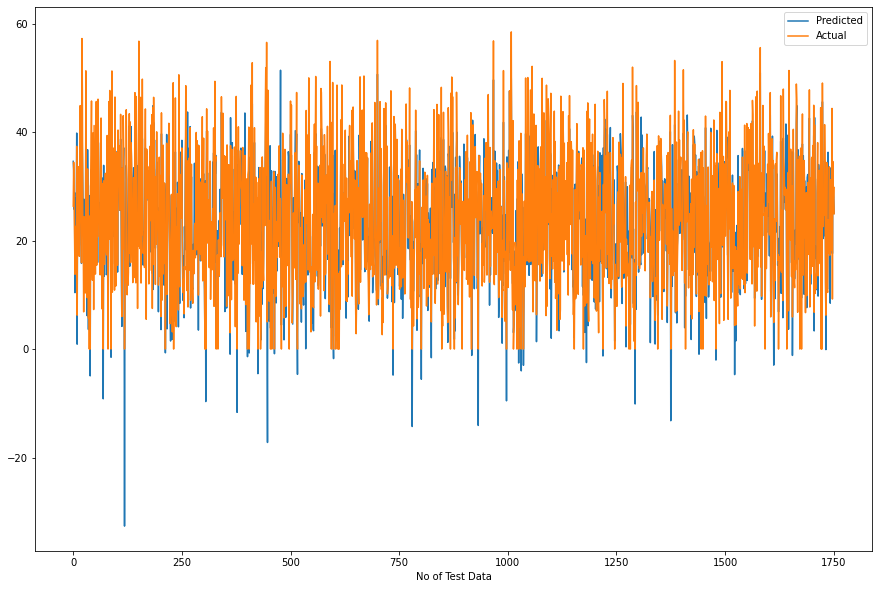

In [139]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [140]:
pd.DataFrame(y_pred_test,y_test)

,0
Rented_Bike_Count,
26.343880,34.601685
34.438351,32.990234
28.089144,25.768433
22.605309,28.844971
13.784049,10.392334
...,...
9.219544,17.605469
34.583233,33.440918
27.838822,29.394165


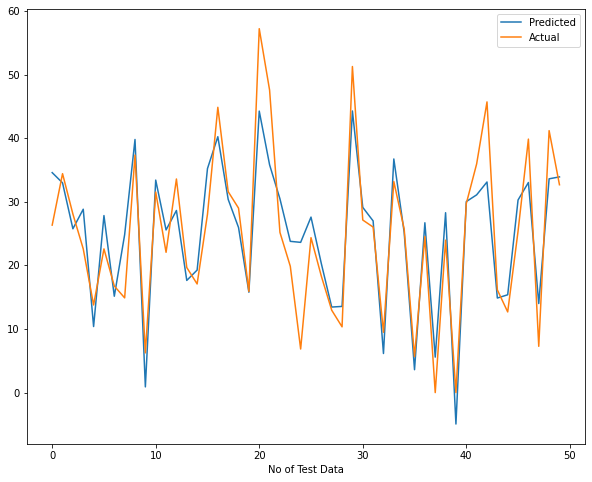

In [141]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test[0:50])
plt.plot(np.array(y_test[0:50]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

The above graph shows tha predicted and actual value distribution of our prediction model. The overall performance is satisfactory.

# Lasso regressor model

In [142]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7950445604214597 0.7925678461654525


In [143]:
lasso.coef_

array([ 4.54758934e-01, -1.24171421e-01,  2.27915187e-02,  3.79598574e-01,
       -5.18517189e+00,  1.39205861e+00,  0.00000000e+00, -1.78724884e+00,
       -4.40541990e+00, -6.89599678e+00, -9.15383289e+00, -8.75519537e+00,
       -3.74775025e+00,  1.69196143e+00,  7.72376556e+00,  1.77037842e+00,
       -2.25212401e+00, -1.93425167e+00, -1.08711756e+00, -1.30235184e+00,
       -1.36953035e+00, -0.00000000e+00,  7.87991662e-01,  4.60179196e+00,
        1.04504429e+01,  7.23100195e+00,  5.97804031e+00,  6.37651723e+00,
        5.04277013e+00,  1.70654050e+00,  2.94302129e+00,  3.79987188e-01,
       -2.94367230e-03, -3.27631264e+00, -3.01675495e+00,  0.00000000e+00,
       -2.82531993e+01,  0.00000000e+00, -1.25422703e+00, -1.99183648e+00,
       -1.47562067e+00,  0.00000000e+00,  2.37166630e+00,  5.00564118e+00,
       -2.55745347e-01, -2.46548383e+00, -5.78774095e-02,  2.09881312e+00,
        2.09998882e-01,  5.50481503e-01])

In [144]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [145]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 32.20797633348617
RMSE : 5.675207162164758
MAE : 4.324063499812541
R2 : 0.7925678461654525
Adjusted R2 : 0.7864704871462125


With quite low value of MSE we can conclude that the model is highly accurate. RMSE value denotes the distribution of the values across the best fit line is well within the acceptable limits. MAE value is low and so the model performance can be considered to be acceptable. R2 and Adjusted R2 are quite closer towards 1 and so we can see that the model performance is good enough to perform the prediction.

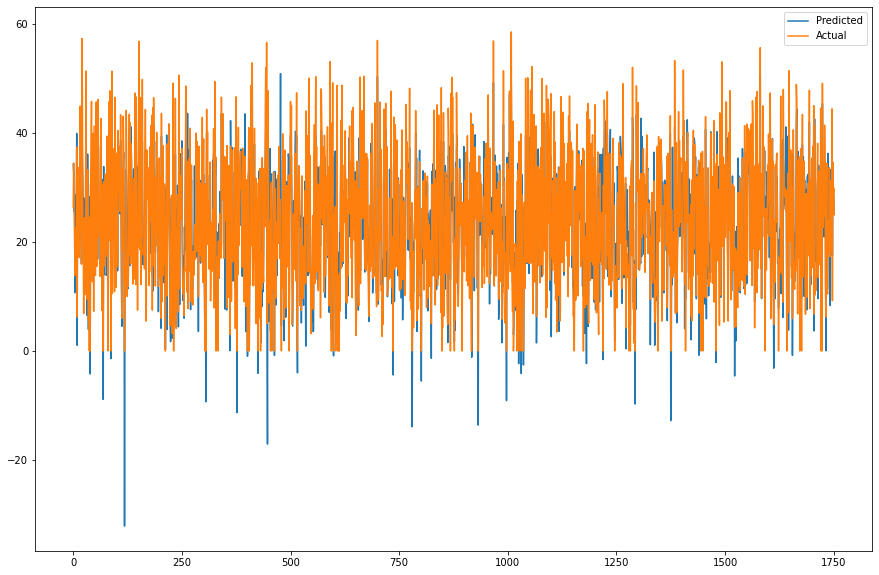

In [146]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [147]:
y_ct=y_test

In [148]:
pd.DataFrame(y_pred_test_lasso,y_test)

,0
Rented_Bike_Count,
26.343880,34.205585
34.438351,32.669306
28.089144,25.542981
22.605309,28.693787
13.784049,10.660258
...,...
9.219544,17.466916
34.583233,33.615315
27.838822,28.863634


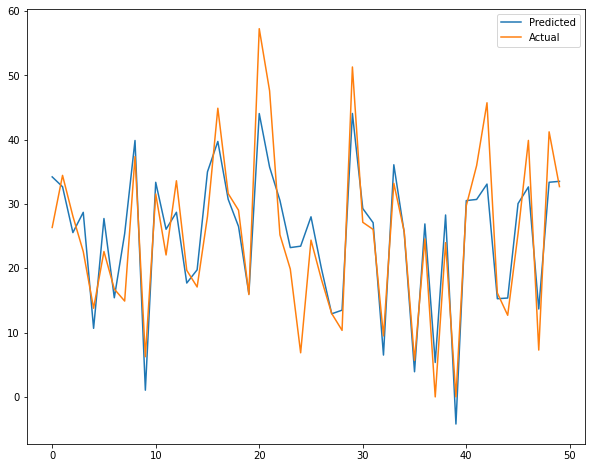

In [149]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso[0:50]))
plt.plot(np.array((y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

The above graph shows tha predicted and actual value distribution of our prediction model. The overall performance is satisfactory.

# Ridge regression model

In [150]:
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.01)

In [151]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [152]:
#check the score
ridge.score(X_train, y_train)

0.7932751418953446

In [153]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [154]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 32.09815457389865
RMSE : 5.665523327451635
MAE : 4.312698799459886
R2 : 0.7932751418953446
Adjusted R2 : 0.7871985734619333


With quite low value of MSE we can conclude that the model is highly accurate. RMSE value denotes the distribution of the values across the best fit line is well within the acceptable limits. MAE value is low and so the model performance can be considered to be acceptable. R2 and Adjusted R2 are quite closer towards 1 and so we can see that the model performance is good enough to perform the prediction.

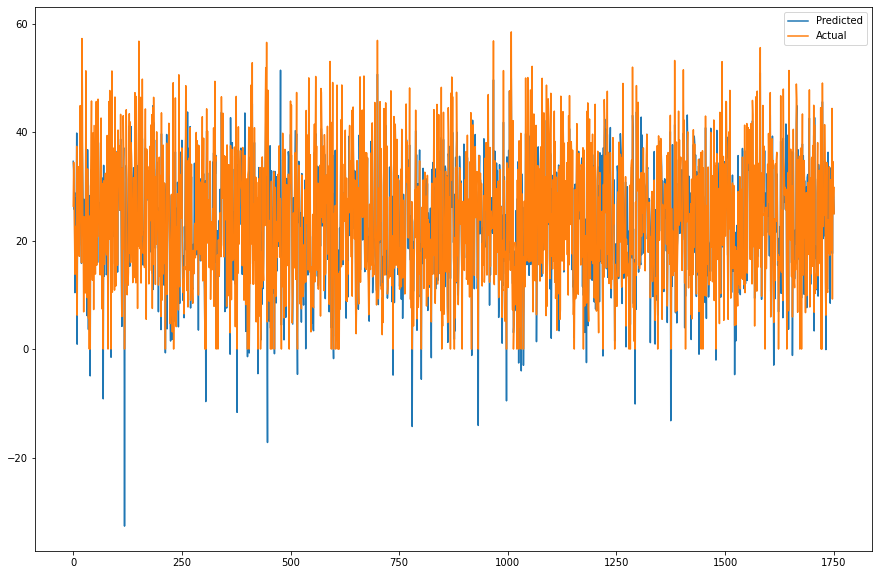

In [155]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [156]:
pd.DataFrame(y_pred_test_ridge,y_test)

,0
Rented_Bike_Count,
26.343880,34.601223
34.438351,32.990076
28.089144,25.767995
22.605309,28.844574
13.784049,10.391752
...,...
9.219544,17.604242
34.583233,33.441391
27.838822,29.393668


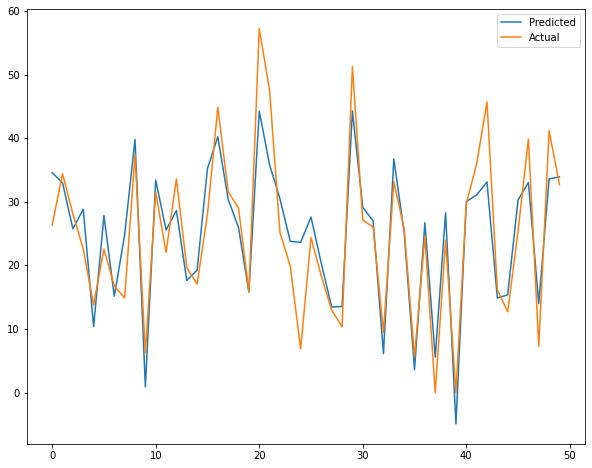

In [157]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

The above graph shows tha predicted and actual value distribution of our prediction model. The overall performance is satisfactory.

# XGBOOST REGRESSOR MODEL

In [158]:
from xgboost import XGBRegressor

In [159]:
# define model
model = XGBRegressor()
# fit model
model.fit(X_train, y_train)

[07:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [160]:
y_pred_train_xgb=model.predict(X_train)
y_pred_test_xgb=model.predict(X_test)

In [161]:
pd.DataFrame(y_pred_test_xgb,y_test)

,0
Rented_Bike_Count,
26.343880,31.985821
34.438351,33.822247
28.089144,27.890425
22.605309,29.002432
13.784049,13.431493
...,...
9.219544,14.643251
34.583233,31.297544
27.838822,28.346752


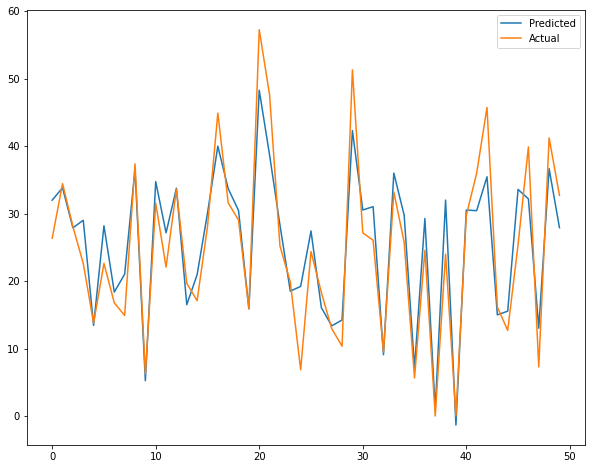

In [162]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_xgb[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

The above graph shows tha predicted and actual value distribution of our prediction model. The overall performance is satisfactory and better than OLS model or any other model

In [163]:
model.score(X_train, y_train)

0.8792511118058354

# ADA BOOST REGRESSION MODEL

In [164]:
from sklearn.ensemble import AdaBoostRegressor

In [165]:
# define model
model_ada = AdaBoostRegressor()
# fit model
model_ada.fit(X_train, y_train)

AdaBoostRegressor()

In [166]:
y_pred_train_ada=model_ada.predict(X_train)
y_pred_test_ada=model_ada.predict(X_test)

In [167]:
pd.DataFrame(y_pred_test_ada,y_test)

,0
Rented_Bike_Count,
26.343880,33.439215
34.438351,32.415251
28.089144,25.868823
22.605309,26.622590
13.784049,18.172060
...,...
9.219544,14.731234
34.583233,33.953849
27.838822,25.544327


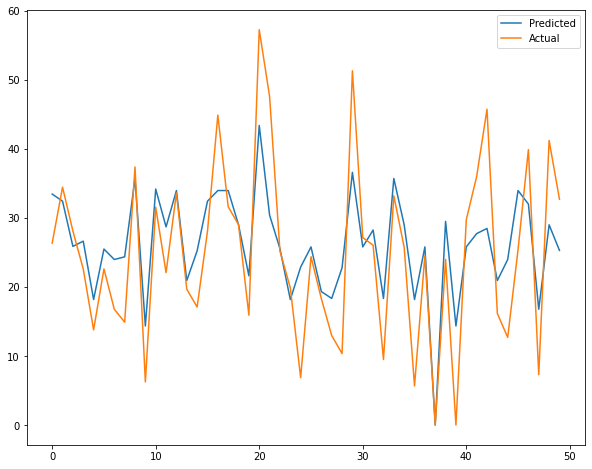

In [168]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ada[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [170]:
model_ada.score(X_train, y_train)

0.6097052571734507

#GradientBoostingRegressor

In [171]:
from sklearn.ensemble import GradientBoostingRegressor

In [172]:
# define model
model_grad = GradientBoostingRegressor()
# fit model
model_grad.fit(X_train, y_train)

GradientBoostingRegressor()

In [173]:
y_pred_train_grad=model_grad.predict(X_train)
y_pred_test_grad=model_grad.predict(X_test)

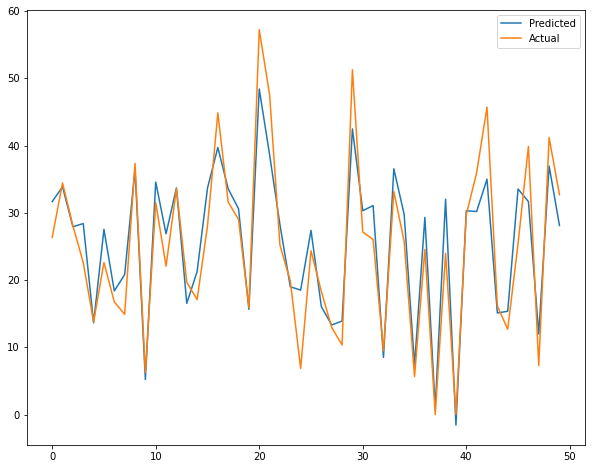

In [174]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_grad[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [175]:
model_grad.score(X_train, y_train)

0.8773928275306472


The model score is higher as compared to simple regression model but the only drawback is the black box. That is the explainability of the model is a huge costion while predicting the dependent variable.

# Conclusion
After the analysis we conclude that, this analysis will be helpful for the supplying entities in Seoul city to predict the demand for the rental bikes based on the primary and atmospheric data of the city. The predicted values were highly accurate and so the companies can rely on the model in order to predict the demand for the bikes on a particular date based on temperature, humidity, wind speed, solar radiation, type of day (Holiday/No holiday), hour and month.